# SIRS Model (Epidemic Spread)

### Author: Abhinna Sundar
### This program is based on Cellular Automata 

### Deterministic spreading

In [272]:
import matplotlib.pyplot as plt
import time
import sys
import numpy as np
from matplotlib import cm 
from matplotlib.colors import ListedColormap
import os
import random

cmap = ListedColormap(['w', 'k', 'r'])

def progressbar(it, prefix="", size=60, file=sys.stdout):
    count = len(it)
    def show(j):
        x = int(size*j/count)
        file.write("%s[%s%s] %i/%i\r" % (prefix, "#"*x, "."*(size-x), j, count))
        file.flush()        
    show(0)
    for i, item in enumerate(it):
        yield item
        show(i+1)
    file.write("\n")
    file.flush()

def create_world(n, q):
    world = np.zeros((n+2, n+2))
    forest = world[1:-1, 1:-1]
    forest[:, :] = np.random.choice([0, 1], p=[1-q, q], size=(n, n))
    return world    
    
def Matrix(n):
    A= np.zeros((n,n), int)    # defining a matrix 
    
    # Boundary conditions
    for i in range(len(A)-1):
        A[0][i]=0
        A[n-1][i]=0
        A[i][0]=0
        A[i][n-1]=0

   # initial conditions
    A[60][65]=1
    A[55][20]=1
    A[10][60]=1
    A[35][30]=1
    A[5][25]=1
    A[65][45]=1
    A[40][55]=1
    A[20][40]=1
    A[45][5]=1
    A[20][10]=1
    return A

def Count_Infected(Arr):
    count=0
    for i in Arr:
        if i>0 and i<5:
            count+=1
    return count        


def neighboursvalue(m, i, j):  #gives the value of neighbours (8 in total)
    return [m[x][y] for x in [i-1,i,i+1] for y in [j-1,j,j+1] if x in range(0,len(m)) and y in range(0,len(m[x])) and (x,y) != (i,j)]

def SIRS(A, t_i, t_r): #input- matrix, t_i, t_r
    
    t_0 = t_i + t_r
    B= A.copy()
    k={1,2,3,4}
    for i in range(1, len(A)-1):
        for j in range(1, len(A)-1):
            
            if (((B[i][j]/t_0 - B[i][j]//t_0)==0)):
                n = set(neighboursvalue(A,i,j)) 
                if (len(n.intersection(k))!=0):
                    B[i][j] = 1
                else:
                    B[i][j] = 0
            else:
                B[i][j]+=1           

    C = B.copy()        #creating copy of B matrix to impose conditions
    sus=[]
    ref=[]
    inf=[]
    
    for i in range(1, len(B)-1):
        for j in range(1, len(B)-1):
            if((B[i][j]/t_0 - B[i][j]//t_0)==0):        # Susceptible stage (t=0)
                C[i][j] =0
                sus.append(0)
            elif((B[i][j]/t_0 - B[i][j]//t_0)>0 and (B[i][j]/t_0 - B[i][j]//t_0) <= t_i/t_0):  # Infected stage (1<=t<=4)
                C[i][j] =2
                inf.append(2)
            elif((B[i][j]/t_0 - B[i][j]//t_0)>t_i/t_0 and (B[i][j]/t_0 - B[i][j]//t_0) <= t_i +t_r/t_0):   # Refractory stage (5<=t<=9)
                C[i][j] =1
                ref.append(1)

    tot_sus = len(sus)
    tot_ref = len(ref)
    tot_inf = len(inf)
                

    return B, C, tot_sus, tot_ref, tot_inf  

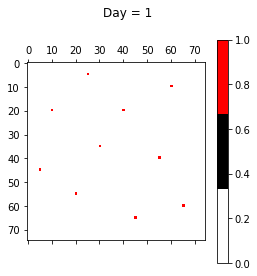

In [273]:
A= Matrix(75)
t_i= 2
t_r= 11

plt.matshow(A, cmap=cmap)
plt.suptitle('Day = 1')
plt.colorbar()
save_results_to = 'D:/IISER Mohali Majors/Sem VIII/IDC 621 Modelling Complex Systems/Cellular Atomata/Plots/Moore_scaled/2and11/'
plt.savefig(save_results_to + 'Day 1.png', dpi = 300)
#plt.close()
plt.show()

In [274]:
susceptible=[]
refractory=[]
infected=[]
for i in progressbar(range(100), "Computing: ", 50):
    
    plt.matshow(SIRS(A, t_i, t_r)[1] ,cmap=cmap)
    plt.colorbar()
    plt.suptitle('Day '+str(i+2))
    save_results_to = 'D:/IISER Mohali Majors/Sem VIII/IDC 621 Modelling Complex Systems/Cellular Atomata/Plots/Moore_scaled/2and11/'
    plt.savefig(save_results_to + 'Day '+str(i+2)+'.png', dpi = 300)
    plt.close()

    A= SIRS(A, t_i, t_r)[0]
    susceptible.append(SIRS(A, t_i, t_r)[2])
    refractory.append(SIRS(A, t_i, t_r)[3])
    infected.append(SIRS(A, t_i, t_r)[4])
#    plt.close()
    
    time.sleep(0.1)

Computing: [##################################################] 100/100


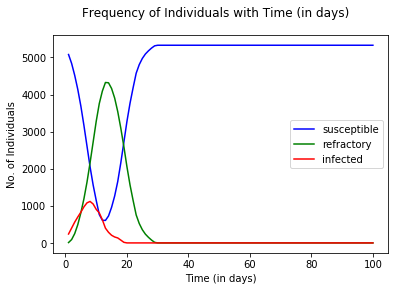

In [275]:
days= np.linspace(1, len(infected), len(infected))
plt.suptitle('Frequency of Individuals with Time (in days)')
plt.ylabel('No. of Individuals')
plt.xlabel('Time (in days)')
plt.plot(days, susceptible, color='b')
plt.plot(days, refractory, color='g')
plt.plot(days, infected, color='r')
plt.legend(['susceptible','refractory','infected'])
save_results_to = 'D:/IISER Mohali Majors/Sem VIII/IDC 621 Modelling Complex Systems/Cellular Atomata/Plots/Moore_scaled/2and11/'
plt.savefig(save_results_to + 'Deterministic_Plot.png', dpi = 300)
#plt.close()
plt.show()

### Probabilistic spreading 

In [195]:
import matplotlib.pyplot as plt
import time
import sys
import numpy as np
from matplotlib import cm 
from matplotlib.colors import ListedColormap
import random
import os

cmap = ListedColormap(['w', 'k', 'r'])

def progressbar(it, prefix="", size=60, file=sys.stdout):
    count = len(it)
    def show(j):
        x = int(size*j/count)
        file.write("%s[%s%s] %i/%i\r" % (prefix, "#"*x, "."*(size-x), j, count))
        file.flush()        
    show(0)
    for i, item in enumerate(it):
        yield item
        show(i+1)
    file.write("\n")
    file.flush()

def removeDuplicates(lst): 
      
    return [t for t in (set(tuple(i) for i in lst))]

def random_neighbours(i,j):
    m = indexes(i,j)
    k = random.randint(1,8)
    sampling = random.choices(m,k=k)
    unique=removeDuplicates(sampling)
#np.random.choice(m, 3, p=[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])
    return(unique)  
    
def Matrix(n):
    A= np.zeros((n,n), int)    # defining a matrix 
    
    # Boundary conditions
    for i in range(len(A)-1):
        A[0][i]=0
        A[n-1][i]=0
        A[i][0]=0
        A[i][n-1]=0

   # initial conditions
    A[60][65]=1
    A[55][20]=1
    A[10][60]=1
    A[35][30]=1
    A[5][25]=1
    A[65][45]=1
    A[40][55]=1
    A[20][40]=1
    A[45][5]=1
    A[20][10]=1
    return A

def Count_Infected(Arr):
    count=0
    for i in Arr:
        if i>0 and i<5:
            count+=1
    return count        


def neighboursvalue(m, i, j):  #gives the value of neighbours (8 in total)
    return [m[x][y] for x in [i-1,i,i+1] for y in [j-1,j,j+1] if x in range(0,len(m)) and y in range(0,len(m[x])) and (x,y) != (i,j) and (x,y) != (i-1,j-1) and (x,y) != (i-1,j+1) and (x,y) != (i+1,j-1) and (x,y) != (i+1,j+1)]

def SIRS(A, t_i, t_r): #input- matrix, t_i, t_r
    
    t_0 = t_i + t_r
    B= A.copy()
    k={1,2,3,4}
    for i in range(1, len(A)-1):
        for j in range(1, len(A)-1):
            
            if (((B[i][j]/t_0 - B[i][j]//t_0)==0)):
                n = set(neighboursvalue(A,i,j)) 
                if (len(n.intersection(k))!=0):
                    inf_count = len([k for k in neighboursvalue(A,i,j) if (k <5 and k>0)])
                    rand= random.randint(1,4)
                    if (inf_count>=rand):
                    #if len(neighboursvalue)
                        B[i][j] = 1
                else:
                    B[i][j] = 0
            else:
                B[i][j]+=1           

    C = B.copy()        #creating copy of B matrix to impose conditions
    sus=[]
    ref=[]
    inf=[]
    
    for i in range(1, len(B)-1):
        for j in range(1, len(B)-1):
            if((B[i][j]/t_0 - B[i][j]//t_0)==0):        # Susceptible stage (t=0)
                C[i][j] =0
                sus.append(0)
            elif((B[i][j]/t_0 - B[i][j]//t_0)>0 and (B[i][j]/t_0 - B[i][j]//t_0) <= t_i/t_0):  # Infected stage (1<=t<=4)
                C[i][j] =2
                inf.append(2)
            elif((B[i][j]/t_0 - B[i][j]//t_0)>t_i/t_0 and (B[i][j]/t_0 - B[i][j]//t_0) <= t_i +t_r/t_0):   # Refractory stage (5<=t<=9)
                C[i][j] =1
                ref.append(1)

    tot_sus = len(sus)
    tot_ref = len(ref)
    tot_inf = len(inf)
                

    return B, C, tot_sus, tot_ref, tot_inf  

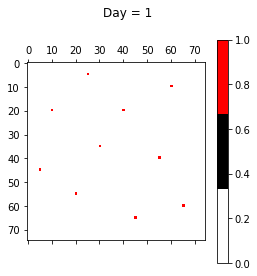

In [214]:
A= Matrix(75)
t_i= 4
t_r= 9

plt.matshow(A, cmap=cmap)
plt.suptitle('Day = 1')
plt.colorbar()
save_results_to = 'D:/IISER Mohali Majors/Sem VIII/IDC 621 Modelling Complex Systems/Cellular Atomata/Plots/Probabilistic1/'
plt.savefig(save_results_to + 'Day 1.png', dpi = 300)
#plt.close()
plt.show()

In [215]:
susceptible=[]
refractory=[]
infected=[]
for i in progressbar(range(100), "Computing: ", 50):
    
    plt.matshow(SIRS(A, t_i, t_r)[1] ,cmap=cmap)
    plt.colorbar()
    plt.suptitle('Day '+str(i+2))
    save_results_to = 'D:/IISER Mohali Majors/Sem VIII/IDC 621 Modelling Complex Systems/Cellular Atomata/Plots/Probabilistic1/'
    plt.savefig(save_results_to + 'Day '+str(i+2)+'.png', dpi = 300)
    plt.close()

    A= SIRS(A, t_i, t_r)[0]
    susceptible.append(SIRS(A, t_i, t_r)[2])
    refractory.append(SIRS(A, t_i, t_r)[3])
    infected.append(SIRS(A, t_i, t_r)[4])
    
    time.sleep(0.1)

Computing: [##################################################] 100/100


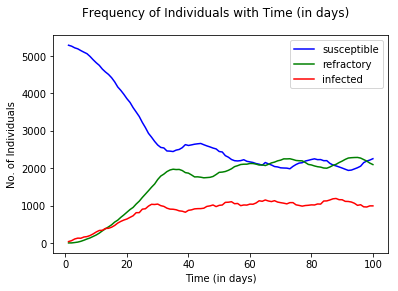

In [216]:
days= np.linspace(1, len(infected), len(infected))
plt.suptitle('Frequency of Individuals with Time (in days)')
plt.ylabel('No. of Individuals')
plt.xlabel('Time (in days)')
plt.plot(days, susceptible, color='b')
plt.plot(days, refractory, color='g')
plt.plot(days, infected, color='r')
plt.legend(['susceptible','refractory','infected'])
save_results_to = 'D:/IISER Mohali Majors/Sem VIII/IDC 621 Modelling Complex Systems/Cellular Atomata/Plots/Probabilistic1/'
plt.savefig(save_results_to + 'Probabilistic_Plot4.png', dpi = 300)
#plt.close()
plt.show()

In [130]:
#def indexes(row,col):
X=10
Y=10

def indexes(x,y):
    X=10
    Y=10
    neighbors = lambda x, y : [(x2, y2) for x2 in range(x-1, x+2)
                               for y2 in range(y-1, y+2)
                               if (-1 < x <= X and
                                   -1 < y <= Y and
                                   (x != x2 or y != y2) and
                                   (0 <= x2 <= X) and
                                   (0 <= y2 <= Y))]
    return(neighbors(x,y))

In [272]:
def removeDuplicates(lst): 
      
    return [t for t in (set(tuple(i) for i in lst))]

def random_neighbours(i,j):
    m = indexes(i,j)
    k = random.randint(1,8)
    sampling = random.choices(m,k=k)
    unique=removeDuplicates(sampling)
#np.random.choice(m, 3, p=[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])
    return(unique)

ind = random_neighbours(5,6)
for values in ind:
    print(values, '\t', [values[0],values[1]])

(4, 6) 	 [4, 6]
(4, 7) 	 [4, 7]
(5, 7) 	 [5, 7]
(5, 5) 	 [5, 5]


In [269]:
for i in range(5):
    print(random_neighbours(1,1))

[(1, 2)]
[(0, 2)]
[(1, 0), (0, 2)]
[(2, 0), (1, 0), (0, 2), (2, 1)]
[(1, 2), (0, 1), (0, 0), (2, 2), (1, 0), (0, 2)]


In [285]:
random.randint(1,8)

7

### First order Moore and second order Van-Neumann comparison

In [242]:
import matplotlib.pyplot as plt
import time
import sys
import numpy as np
from matplotlib import cm 
from matplotlib.colors import ListedColormap
import random
import os

cmap = ListedColormap(['w', 'k', 'r'])

def progressbar(it, prefix="", size=60, file=sys.stdout):
    count = len(it)
    def show(j):
        x = int(size*j/count)
        file.write("%s[%s%s] %i/%i\r" % (prefix, "#"*x, "."*(size-x), j, count))
        file.flush()        
    show(0)
    for i, item in enumerate(it):
        yield item
        show(i+1)
    file.write("\n")
    file.flush()

def removeDuplicates(lst): 
      
    return [t for t in (set(tuple(i) for i in lst))]

def random_neighbours(i,j):
    m = indexes(i,j)
    k = random.randint(1,8)
    sampling = random.choices(m,k=k)
    unique=removeDuplicates(sampling)
#np.random.choice(m, 3, p=[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])
    return(unique)  
    
def Matrix(n):
    A= np.zeros((n,n), int)    # defining a matrix 
    
    # Boundary conditions
    for i in range(len(A)-1):
        A[0][i]=0
        A[n-1][i]=0
        A[i][0]=0
        A[i][n-1]=0

   # initial conditions
    A[60][65]=1
    A[55][20]=1
    A[10][60]=1
    A[35][30]=1
    A[5][25]=1
    A[65][45]=1
    A[40][55]=1
    A[20][40]=1
    A[45][5]=1
    A[20][10]=1

    return A

def Count_Infected(Arr):
    count=0
    for i in Arr:
        if i>0 and i<5:
            count+=1
    return count        


def sec_neighboursvalue(m, i, j):  #gives the value of neighbours (8 in total)
    return [m[x][y] for x in [i-2,i-1,i,i+1,i+2] for y in [j-2,j-1,j,j+1,j+2] if x in range(0,len(m)) and y in range(0,len(m[x])) and (x,y) != (i-2,j-2)  and (x,y) != (i-2,j-1) and (x,y) != (i-2,j+1) and (x,y) != (i-2,j+2) and (x,y) != (i-1,j-2) and (x,y) != (i-1,j) and (x,y) != (i-1,j+2) and (x,y) != (i,j-1) and (x,y) != (i,j) and (x,y) != (i,j+1) and (x,y) != (i+1,j-2) and (x,y) != (i+1,j) and (x,y) != (i+1,j+2) and (x,y) != (i+2,j-2) and (x,y) != (i+2,j-1) and (x,y) != (i+2,j+1) and (x,y) != (i+2,j+2) ]

def SIRS(A, t_i, t_r): #input- matrix, t_i, t_r
    
    t_0 = t_i + t_r
    B= A.copy()
    k={1,2,3,4}
    for i in range(1, len(A)-1):
        for j in range(1, len(A)-1):
            
            if (((B[i][j]/t_0 - B[i][j]//t_0)==0)):
                n = set(neighboursvalue(A,i,j)) 
                if (len(n.intersection(k))!=0):
                    inf_count = len([k for k in neighboursvalue(A,i,j) if (k <5 and k>0)])
                    rand= random.randint(1,4)
                    if (inf_count>=rand):
                    #if len(neighboursvalue)
                        B[i][j] = 1
                else:
                    B[i][j] = 0
            else:
                B[i][j]+=1           

    C = B.copy()        #creating copy of B matrix to impose conditions
    sus=[]
    ref=[]
    inf=[]
    
    for i in range(1, len(B)-1):
        for j in range(1, len(B)-1):
            if((B[i][j]/t_0 - B[i][j]//t_0)==0):        # Susceptible stage (t=0)
                C[i][j] =0
                sus.append(0)
            elif((B[i][j]/t_0 - B[i][j]//t_0)>0 and (B[i][j]/t_0 - B[i][j]//t_0) <= t_i/t_0):  # Infected stage (1<=t<=4)
                C[i][j] =2
                inf.append(2)
            elif((B[i][j]/t_0 - B[i][j]//t_0)>t_i/t_0 and (B[i][j]/t_0 - B[i][j]//t_0) <= t_i +t_r/t_0):   # Refractory stage (5<=t<=9)
                C[i][j] =1
                ref.append(1)

    tot_sus = len(sus)
    tot_ref = len(ref)
    tot_inf = len(inf)
                

    return B, C, tot_sus, tot_ref, tot_inf  

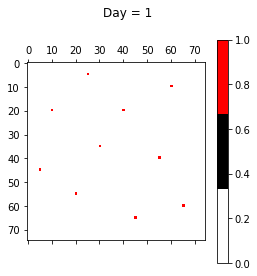

In [243]:
A= Matrix(75)
t_i= 4
t_r= 9

plt.matshow(A, cmap=cmap)
plt.suptitle('Day = 1')
plt.colorbar()
save_results_to = 'D:/IISER Mohali Majors/Sem VIII/IDC 621 Modelling Complex Systems/Cellular Atomata/Plots/Comparison/Probabilistic/'
plt.savefig(save_results_to + 'V_Day 1.png', dpi = 300)
#plt.close()
plt.show()

In [244]:
susceptible=[]
refractory=[]
infected=[]
for i in progressbar(range(100), "Computing: ", 50):
    
    plt.matshow(SIRS(A, t_i, t_r)[1] ,cmap=cmap)
    plt.colorbar()
    plt.suptitle('Day '+str(i+2))
    save_results_to = 'D:/IISER Mohali Majors/Sem VIII/IDC 621 Modelling Complex Systems/Cellular Atomata/Plots/Comparison/Probabilistic/'
    plt.savefig(save_results_to + 'V_Day '+str(i+2)+'.png', dpi = 300)
    plt.close()

    A= SIRS(A, t_i, t_r)[0]
    susceptible.append(SIRS(A, t_i, t_r)[2])
    refractory.append(SIRS(A, t_i, t_r)[3])
    infected.append(SIRS(A, t_i, t_r)[4])
    
    time.sleep(0.1)

Computing: [##################################################] 100/100


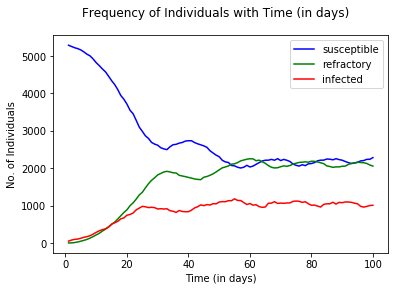

In [245]:
days= np.linspace(1, len(infected), len(infected))
plt.suptitle('Frequency of Individuals with Time (in days)')
plt.ylabel('No. of Individuals')
plt.xlabel('Time (in days)')
plt.plot(days, susceptible, color='b')
plt.plot(days, refractory, color='g')
plt.plot(days, infected, color='r')
plt.legend(['susceptible','refractory','infected'])
save_results_to = 'D:/IISER Mohali Majors/Sem VIII/IDC 621 Modelling Complex Systems/Cellular Atomata/Plots/Comparison/Probabilistic/'
plt.savefig(save_results_to + 'V_Probabilistic_Plot.png', dpi = 300)
#plt.close()
plt.show()